#### Introduccion a la teoria de la computacion

##### Taller #1 - Automatas finitos

1.Considere el problema de determinar si un código corresponde a un ISBN de 13 dígitos. Construya un autómata finito determinístico para identificar si un código es válido o no. Especifique formalmente el autómata, dibuje el diagrama y la tabla de transiciones. Implemente el autómata correspondiente utilizado una clase autómata.

<script>console.log("hola")</script>

2.Construya un autómata finito determinístico sobre el alfabeto $\{a,b\}$ la cual acepte todas las cadenas que contengan NO más de dos ocurrencias consecutivas de la misma entrada (Por ejemplo, abba es aceptada y abbba no es aceptada). Especifique formalmente el autómata, dibuje el diagrama y la tabla de transiciones. 

Sea $\textbf{A}$ un AFD tal que:
$$A = (Q,\Sigma,\delta,q_0,F)$$

Se tiene que $\Sigma = \{a,b\}$, se considera a **1** como estado inicial, en este estado no se ha ingresado ningun simbolo, por lo tanto se tiene que no hay ninguna ocurrencia consecutiva y **1** es un estado final, despues de leer un simbolo puede pasas a 2 estados, el estado **2** que recuerda que el simbolo **a** se ha leido una vez, y el estado **4** que recuerda que el simbolo **b** se ha leido una vez, en estos estados se sabe que solo se han leido **a** o **b** una vez, entonces estos son estados finales. Si se esta en el estado **2** y se lee el simbolo **b** se sabe que solo se ha leido una vez entonces pasa al estado **4**, si se lee **a** estando en el estado **4** entonces pasaria a **2** por la misma razon. Ya con esto el automata necesita recordar si un simbolo se ha leido de manera consecutiva por segunda vez, para esto se crea el estado **3** para recordar que se han leido 2 simbolos **a** consecutivos y el estado **5** para recordar que se han leido 2 simbolos **b** consecutivos. En cualquiera de estos 2 estados se cumple que solo hay 2 ocurrencias consecutivas de un simbolo. Entoncces, estos estados son estados finales. Por ultimo, se crea un estado **6** en el cual se sabe que se ha leido el mismo simbolo 3 veces consecutivas, Por lo cual este estado no es un estado final, si se llega a este estado no importa que simbolo se lee despues por que la cadena ya no es aceptada.

Formalmente el automata $\textbf{A}$ es:
$$ A = (\{1,2,3,4,5,6\},\{a,b\},\delta,1,\{1,2,3,4,5\})$$

Donde la funcion $\delta$ se representa por la siguiente tabla. 

|           | **a**   |  **b**  |
| --------- | ------- | ------- |
| &rarr;\*1 |    2    |    4    |
|   \*2     |    3    |    4    |
|   \*3     |    6    |    4    |
|   \*4     |    2    |    5    |
|   \*5     |    6    |    2    |
|   6       |    6    |    6    |
 

In [144]:
import networkx as nx
from nxpd import draw, nxpdParams
nxpdParams['show'] = 'ipynb'

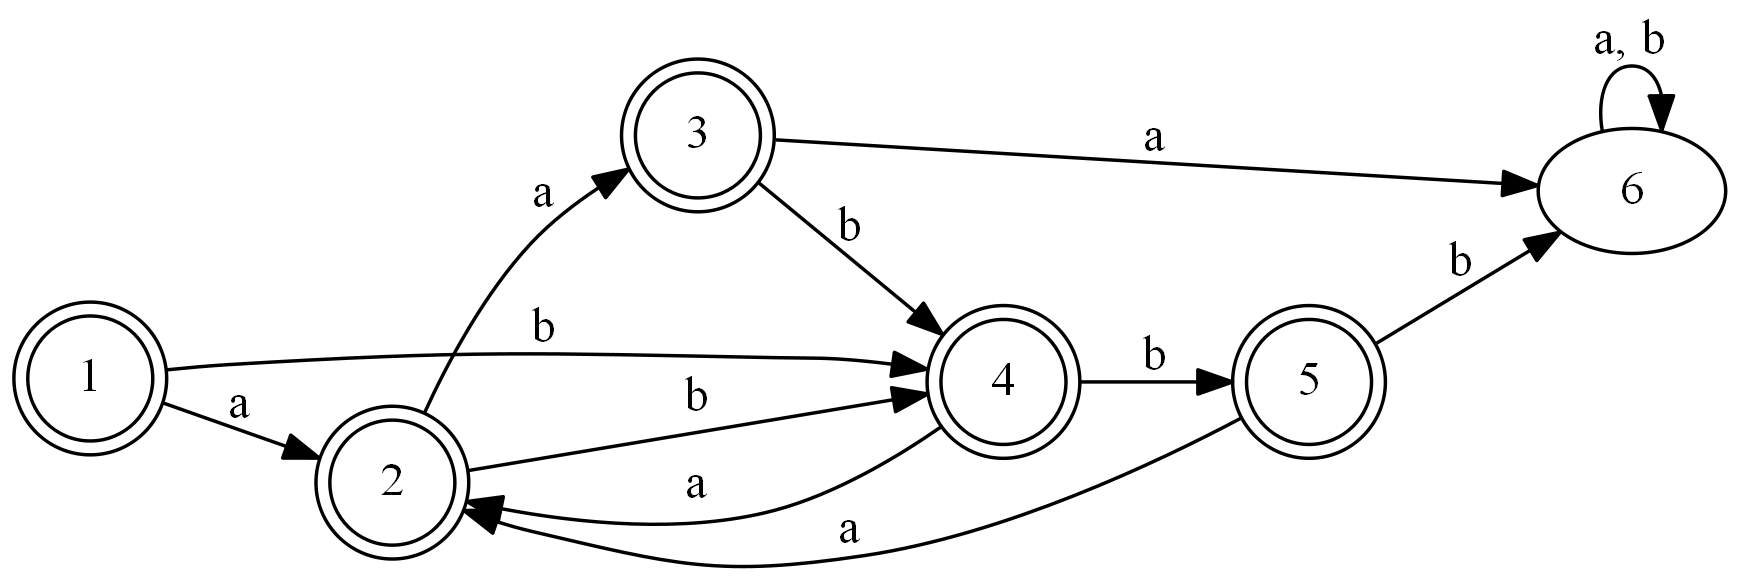

In [145]:
G = nx.DiGraph()
G.graph['rankdir'] = 'LR' #Left to Right
G.graph['dpi'] = 250 #(dots per inch) 
G.add_node(1, shape='doublecircle')
G.add_node(2, shape='doublecircle')
G.add_node(3, shape='doublecircle')
G.add_node(4, shape='doublecircle')
G.add_node(5, shape='doublecircle')
elist=[(1,2,{'label':'a'}),(2,3,{'label':'a'}),(3,6,{'label':'a'})
       ,(1,4,{'label':'b'}),(4,5,{'label':'b'}),(5,6,{'label':'b'})
       ,(5,2,{'label':'a'}),(3,4,{'label':'b'}),(2,4,{'label':'b'})
       ,(4,2,{'label':'a'}),(6,6,{'label':'a, b'})]
G.add_edges_from(elist)
draw(G)

3.Dado un autómata finito determinístico $\textbf{M}$, construya un nuevo autómata finito determinístico $\textbf{M}'$ con el mismo alfabeto de entrada y con la propiedad de que para todos los $w \in\Sigma^{*}$, $w$ es aceptado por $\textbf{M}'$ si y solo si $w$ NO es aceptado por $\textbf{M}$.

Para un AFD $\textbf{M}$ cualquiera definido por la quintupla $(Q,\Sigma,\delta,q_0,F)$ se puede considera $L(M)$ como el lenguaje(el conjunto de todas las palabras) que acepta $\textbf{M}$, definida la funcion extendida $\delta^*(q, w)$, $L(M)$ se puede expresar de la forma:

$$L(M) = \{w\ |\ \delta^*(q_{0}, w)\in F\} $$

La expresion: "Para todos los $w \in\Sigma^{*}$, $w$ es aceptado por $\textbf{M}'$ si y solo si $w$ no es aceptado por $\textbf{M}$" se podria expresar de la siguiente manera: 

$$L(M') = \{w\ |\ \delta^*(q_{0}, w)\notin F\} $$

Como $w$ no llega a un estado final con la funcion extendida $\delta^*(q_0, w)$, se tiene que $w$ no es una palabra aceptada para $\textbf{M}$, pero si para $\textbf{M}'$. Para que $\textbf{M}'$ acepte palabras se deben espeficar estados finales, como ya se sabe que una palabra $w$ es aceptada por $\textbf{M}'$ si esta en cualquier estado que no este contedino en F, el lenguaje de $\textbf{M}'$ se puede espeficar como: 

$$L(M') = \{w\ |\ \delta^*(q_{0}, w)\in Q-F\}$$

Aunque se haya obviado se tiene que tener encuenta que la funcion $\delta^*$ y por lo tanto la funcion $\delta$, el estado $q_0$ y el conjunto de estados $Q$ usados para definir el lenguaje $L(M')$ son del automata inicial $\textbf{M}$. Ya espesificado esto se puede definir a $\textbf{M}'$ como:

$$M' = (Q,\Sigma,\delta,q_0,Q-F)$$

3.Dados dos autómatas finitos determinísticos $\textbf{M}_{\textbf{1}}$ y $\textbf{M}_{\textbf{2}}$ con el mismo alfabeto de entrada, construya un tercer autómata finito determinísticos $\textbf{M}$ con la propiedad que $w \in\Sigma^{*}$ es aceptado por M si y solo si es aceptado por ambos $\textbf{M}_{\textbf{1}}$ y $\textbf{M}_{\textbf{2}}$.




In [2]:
H=nx.path_graph(10)
G.clear()
G.add_nodes_from(H)
G.add_edges_from([(4,8),(1,3),(1,0),(5,3),(6,3),(7,0),(1,4),(9,8),(8,2),(9,7),(3,9)])
G.graph['dpi'] = 300 
G.graph['rankdir'] = 'LR'
draw(G, show='ipynb')

NameError: name 'nx' is not defined

$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$

##### Jesus Felipe Chavarro Muñoz